# Esercitazione 6

## Esercizio 06.1

Vogliamo applicare l'algoritmo di Metropolis a un modello di Ising 1D per un sistema ferromagnetico di $N = 50$ spin. L'hamiltoniana del nostro sistema è:
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove abbiamo $J>0$ (sistema ferromagnetico) e $h$ è il campo esterno.
Lavoriamo usando $k_B = 1$ e $\mu_B = 1$ per avere spin che valgono $\pm 1$ 

Modifichiamo il codice che ci è stato fornito e per prima cosa implementiamo la possibilità di ripartire dalla configurazione finale ottenuta nella simulazione precedente tramite una variabile restart che viene letta in input. Quando $restart = 1$ il codice legge l'ultima configurazione ottenuta nella simulazione precedente dal file $config.final$ e la usa come configurazione di partenza. In questo modo possiamo eseguire alcune simulazioni preliminari per equilibrare il sistema alla temperatura desiderata.

Oltre al già implementato algoritmo di Metropolis implementiamo anche l'algoritmo di Gibbs nel seguente modo:
1. scegliamo uno spin a caso
2. indipendentemente dal suo valore attuale giriamo lo spin verso l'alto ($s = + 1$) tenendo fissi i suoi primi vicini con probabilità:
$$
p(s_i = +1|s_{j\neq i}) = \frac{1}{1+\exp{-2\beta [J(s_{i-1}+s_{i+1}) +h]}}
$$

3. se non giriamo lo spin verso l'alto allora lo giriamo verso il basso in modo che una mossa sia sempre accettata


Una volta implementato l'algoritmo di Gibbs aggiungiamo al codice il calcolo di:

- Capacità termica: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
- Suscettività magnetica a campo nullo: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
- Magnetizzazione: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

e la possibilità di fare una media a blocchi su queste grandezze.

Una volta equilibrato il sistema a $T=2$ andiamo a diminuire la temperatura fino a T = $0.5$ con passo 0.01 e misuriamo l'energia interna per particella, la capacità termica e la suscettività magnetica a campo nullo. Riportiamo anche i valori trovati per la magnetizzazione con  campo esterno $h = 0.02$. 

Facciamo simulazioni campionando il peso di Boltzmann sia con l'algoritmo di Metropolis che con l'algoritmo di Gibbs, ciascuna simulazione è costituita da 20 blocchi, in ciascuno dei quali facciamo $10^4$ mosse.

Riportiamo i valori medi delle grandezze misurate con le rispettive incertezze e li confrontiamo con i risultati analitici fornitici dalla soluzione analitica del modello di Ising monodimensionale. Poichè dobbiamo rappresentare i valori medi in funzione della temperatura e non del numero di blocchi riportiamo i valori corrispondenti all'ultimo blocco.

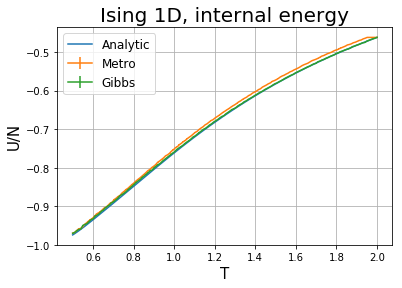

In [70]:
import numpy as np
import matplotlib.pyplot as plt

U_met = np.genfromtxt("Esercizio_06.1/output.metr.ene.dat")      #import data from file
U_gibbs = np.genfromtxt("Esercizio_06.1/output.gibbs.ene.dat")   #import data from file

#since we have 20 blocks for each temperature we plot only the result corresponding to the last block
U = np.zeros(int(len(U_met[:,0])/20))  
U_err = np.zeros(int(len(U_met[:,0])/20))  
Ug = np.zeros(int(len(U_gibbs[:,0])/20))  
Ug_err = np.zeros(int(len(U_gibbs[:,0])/20))  

for i in range(1,len(U)+1):
    U[i-1] = U_met[i*20-1,2]
    U_err[i-1] = U_met[i*20-1,3]
    
for i in range(1,len(Ug)+1):
    Ug[i-1] = U_gibbs[i*20-1,2]
    Ug_err[i-1] = U_gibbs[i*20-1,3]

T = np.linspace(2,0.5,len(U))                                  #generate the desired temperatures
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )                            #analytical expression for the internal energy

plt.plot(T, e, label = 'Analytic')                                              #plot the analytical internal energy
plt.errorbar(T,U, yerr = U_err, label = 'Metro')                             #plot the internal energy estimated through Metropolis algorithm
plt.errorbar(np.linspace(2,0.5,len(Ug)),Ug, yerr = Ug_err, label = 'Gibbs') #plot the internal energy estimated through Gibbs algorithm
plt.title('Ising 1D, internal energy', fontsize = 20)
plt.xlabel('T',fontsize = 15)
plt.ylabel('U/N',fontsize = 15)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

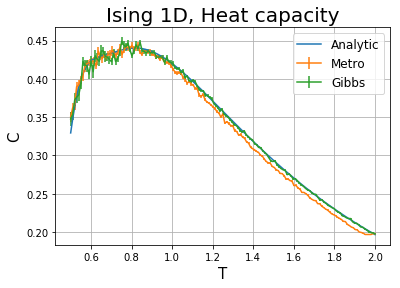

In [73]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) #analytical expression for the heat capacity

C_met = np.genfromtxt("Esercizio_06.1/output.metr.heat.dat")         
C_gibbs = np.genfromtxt("Esercizio_06.1/output.gibbs.heat.dat")         

C = np.zeros(int(len(C_met[:,0])/20))  
C_err = np.zeros(int(len(C_met[:,0])/20))  
Cg = np.zeros(int(len(C_gibbs[:,0])/20))  
Cg_err = np.zeros(int(len(C_gibbs[:,0])/20))  

for i in range(1,len(C)+1):
    C[i-1] = C_met[i*20-1,2]
    C_err[i-1] = C_met[i*20-1,3]
    
for i in range(1,len(Cg)+1):    
    Cg[i-1] = C_gibbs[i*20-1,2]
    Cg_err[i-1] = C_gibbs[i*20-1,3]

plt.plot(T, heat, label = 'Analytic')        
plt.errorbar(T,C, yerr = C_err, label = 'Metro')  
plt.errorbar(np.linspace(2,0.5,len(Ug)),Cg, yerr = Cg_err, label = 'Gibbs')                    
plt.title('Ising 1D, Heat capacity',fontsize = 20)
plt.xlabel('T',fontsize = 15)
plt.ylabel('C',fontsize = 15)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

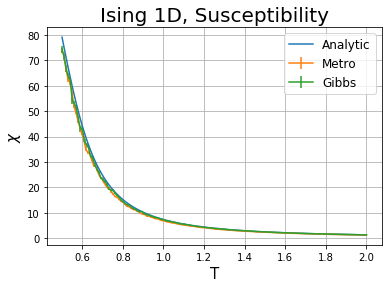

In [74]:
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

X_met = np.genfromtxt("Esercizio_06.1/output.metr.chi.dat")          
X_gibbs = np.genfromtxt("Esercizio_06.1/output.gibbs.chi.dat")        

X = np.zeros(int(len(X_met[:,0])/20))  
X_err = np.zeros(int(len(X_met[:,0])/20))  
Xg = np.zeros(int(len(X_gibbs[:,0])/20))  
Xg_err = np.zeros(int(len(X_gibbs[:,0])/20))  

for i in range(1,len(X)+1):
    X[i-1] = X_met[i*20-1,2]
    X_err[i-1] = X_met[i*20-1,3]
    
for i in range(1,len(Xg)+1):    
    Xg[i-1] = X_gibbs[i*20-1,2]
    Xg_err[i-1] = X_gibbs[i*20-1,3]
    
T = np.linspace(2,0.5,len(X))  

plt.plot(T, chi,  label = 'Analytic')         
plt.errorbar(T,X, yerr = X_err,  label = 'Metro')          
plt.errorbar(np.linspace(2,0.5,len(Xg)),Xg, yerr = Xg_err,  label = 'Gibbs')                    
plt.title('Ising 1D, Susceptibility',fontsize = 20)
plt.xlabel('T',fontsize = 15)
plt.ylabel('$\chi$',fontsize = 15)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

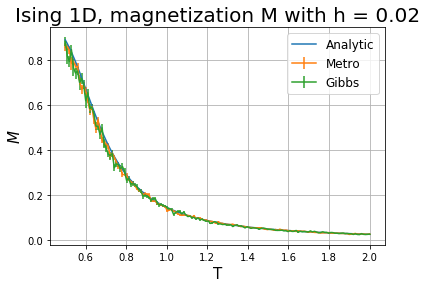

In [75]:
h=0.02                                                           #external field

M_met = np.genfromtxt("Esercizio_06.1/output.metr.magn.dat")          
M_gibbs = np.genfromtxt("Esercizio_06.1/output.gibbs.magn.dat")      

M = np.zeros(int(len(M_met[:,0])/20))  
M_err = np.zeros(int(len(M_met[:,0])/20))  
Mg = np.zeros(int(len(M_gibbs[:,0])/20))  
Mg_err = np.zeros(int(len(M_gibbs[:,0])/20))  

for i in range(1,len(M)+1):
    M[i-1] = M_met[i*20-1,2]
    M_err[i-1] = M_met[i*20-1,3]
    
for i in range(1,len(Mg)+1):    
    Mg[i-1] = M_gibbs[i*20-1,2]
    Mg_err[i-1] = M_gibbs[i*20-1,3]
    
T = np.linspace(2,0.5,len(M))                      
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
Mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



plt.plot(T, Mag, label = 'Analytic')         
plt.errorbar(T,M, yerr = M_err,  label = 'Metro')         
plt.errorbar(np.linspace(2,0.5,len(Mg)),Mg, yerr = Mg_err,  label = 'Gibbs')                           
plt.title('Ising 1D, magnetization M with h = 0.02',fontsize = 20)
plt.xlabel('T',fontsize = 15)
plt.ylabel('$M$',fontsize = 15)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

I dati ottenuti dalla simulazione riproducono bene l'andamento teorico, tuttavia notiamo che a temperature più basse si osservano maggiori fluttuazioni dei nostri dati.